In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/samples_post_extraction_and_labelled.csv')

In [3]:
print(df.shape)
cols_to_drop = [col for col in df.columns if col.startswith('diagnostics_')]
cols_to_drop.extend(['sample_id', 'mycn_amplified'])
print(f'Number of cols to drop: {len(cols_to_drop)}')
print(cols_to_drop)

X = df.drop(columns=cols_to_drop)
print(f'Number of features for model: {len(X.columns)}')

y = df['mycn_amplified']

(47, 131)
Number of cols to drop: 24
['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass', 'sample_id', 'mycn_amplified']
Number of features for model: 107


In [4]:
for col in X.columns:
    print(col, X[col].dtype)

original_shape_Elongation float64
original_shape_Flatness float64
original_shape_LeastAxisLength float64
original_shape_MajorAxisLength float64
original_shape_Maximum2DDiameterColumn float64
original_shape_Maximum2DDiameterRow float64
original_shape_Maximum2DDiameterSlice float64
original_shape_Maximum3DDiameter float64
original_shape_MeshVolume float64
original_shape_MinorAxisLength float64
original_shape_Sphericity float64
original_shape_SurfaceArea float64
original_shape_SurfaceVolumeRatio float64
original_shape_VoxelVolume float64
original_firstorder_10Percentile float64
original_firstorder_90Percentile float64
original_firstorder_Energy float64
original_firstorder_Entropy float64
original_firstorder_InterquartileRange float64
original_firstorder_Kurtosis float64
original_firstorder_Maximum float64
original_firstorder_MeanAbsoluteDeviation float64
original_firstorder_Mean float64
original_firstorder_Median float64
original_firstorder_Minimum float64
original_firstorder_Range float6

In [5]:
# Train validation split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [7]:
# Sample Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

feature_counts = range(1, X_train.shape[1] + 1)
print(feature_counts)
accuracies = []

model = lr

for k in feature_counts:
    selector = SelectKBest(chi2, k=k)
    X_train = selector.fit_transform(X_train, y_train)
    X_val = selector.transform(X_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

range(1, 108)


/home/ruimi/anaconda3/envs/radiomics_neuroblastoma/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=2 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/ruimi/anaconda3/envs/radiomics_neuroblastoma/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=3 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/ruimi/anaconda3/envs/radiomics_neuroblastoma/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=4 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/ruimi/anaconda3/envs/radiomics_neuroblastoma/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/ruimi/anaconda3/envs/radiomics_neuroblastoma/lib/python3.9

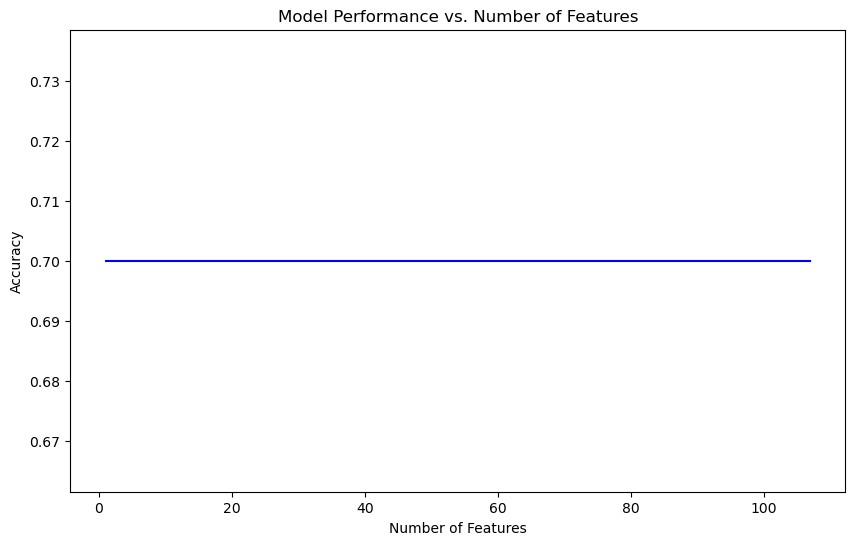

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracies, linestyle='-', color='b')
plt.title('Model Performance vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
# plt.grid(True)
# plt.xticks(feature_counts)
plt.show()